In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
# Documentation on convex hull library here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

In [2]:
def make_onions(X):
    layers = []
    while X.shape[0] > 2:
        # Compute and add this layer
        hull = ConvexHull(X)
        layers.append(X[hull.vertices, :])
        # Remove points from this layer
        idx = np.ones(X.shape[0])
        idx[hull.vertices] = 0
        X = X[idx == 1, :]
    if X.shape[0] > 0:
        layers.append(X)
    return layers

def plot_layers(layers):
    for Xi in layers:
        Xi = np.concatenate((Xi, Xi[0, :][None, :]), axis=0)
        plt.plot(Xi[:, 0], Xi[:, 1])

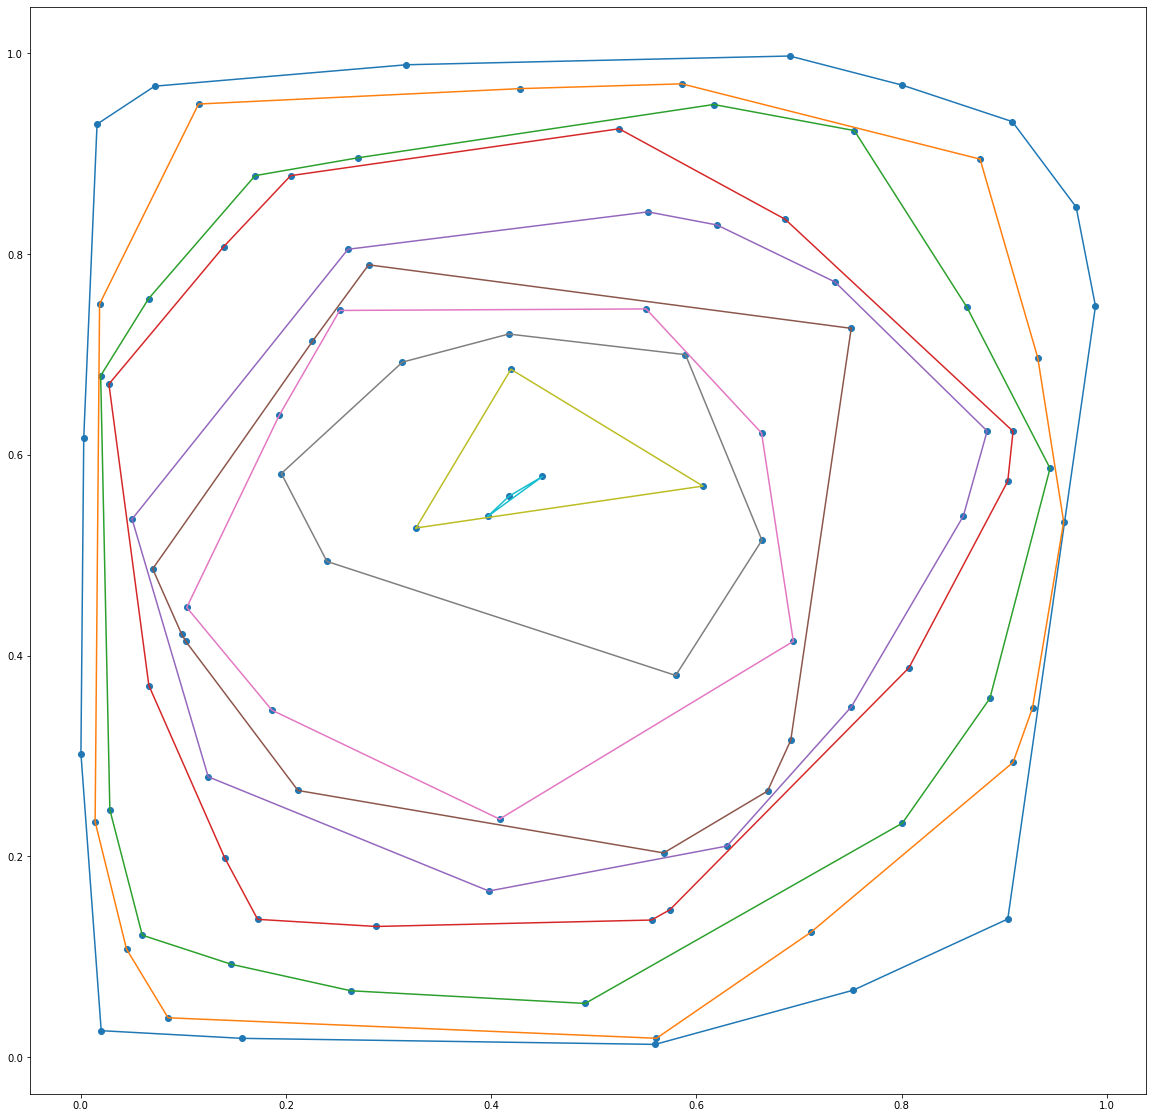

In [3]:
np.random.seed(1)
X = np.random.rand(100, 2)
layers = make_onions(X)

plt.figure(figsize=(20, 20))
plt.scatter(X[:, 0], X[:, 1])
plot_layers(layers)